<a href="https://colab.research.google.com/github/larabros27/neural-network-challenge-1/blob/main/student_loans_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Loan Risk with Deep Learning

In [1]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [2]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
# Review the data types associated with the columns
loans_df.dtypes

,0
payment_history,float64
location_parameter,float64
stem_degree_score,float64
gpa_ranking,float64
alumni_success,float64
study_major_code,float64
time_to_completion,float64
finance_workshop_score,float64
cohort_ranking,float64
total_loan_score,float64


In [4]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

,count
credit_ranking,
1,855
0,744


### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [5]:
# Define the target set y using the credit_ranking column
y = loans_df["credit_ranking"]

# Display a sample of y
y.head()



,credit_ranking
0,0
1,0
2,0
3,1
4,0


In [6]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns=["credit_ranking"])

# Review the features DataFrame
X.head()


,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [7]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [9]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform resampled training data
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test set
X_test_scaled = scaler.transform(X_test)


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [10]:
# Define the number of inputs (features) to the model
n_inputs = X_train_scaled.shape[1]

# Review the number of features
n_inputs



11

In [11]:
# Define the number of hidden nodes for the first hidden layer
n_hidden1 = 64

# Define the number of hidden nodes for the second hidden layer
n_hidden2 = 32

# Define the number of neurons in the output layer
n_output = 1



In [12]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1

# Define the neural network model
model = Sequential() # define model as a Sequential model

# Input layer and first hidden layer
model.add(Input(shape=(n_inputs,)))
model.add(Dense(n_hidden1, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.2))

# Second hidden layer
model.add(Dense(n_hidden2, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.2))

# 🔥 New third hidden layer (added for improved performance)
model.add(Dense(16, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.1))

# Output layer
model.add(Dense(n_output, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Display the Sequential model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [14]:
from tensorflow.keras.optimizers import Adam

# Compile the Sequential model
model.compile(optimizer=Adam (),
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC'])



In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)


In [16]:
# Evaluate on test data
loss, accuracy, precision, recall, auc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test AUC: {auc:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.3357 - Precision: 0.5277 - Recall: 0.7560 - accuracy: 0.4863 - loss: 1.1539
Test Accuracy: 0.4500
Test Loss: 1.1560
Test Precision: 0.4808
Test Recall: 0.7530
Test AUC: 0.3198


In [17]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight('balanced',
                                                classes=np.unique(y_train_resampled),
                                                y=y_train_resampled)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}
print(class_weights)


{0: np.float64(1.0), 1: np.float64(1.0)}


In [18]:
# Fit the model using 50 epochs and the training data
history = model.fit(X_train_scaled, y_train_resampled, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], class_weight=class_weights)



Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - AUC: 0.5057 - Precision: 0.5647 - Recall: 0.7392 - accuracy: 0.5434 - loss: 1.1269 - val_AUC: 0.7952 - val_Precision: 0.5324 - val_Recall: 0.7872 - val_accuracy: 0.6920 - val_loss: 1.0626
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.7213 - Precision: 0.6969 - Recall: 0.7822 - accuracy: 0.6987 - loss: 1.0479 - val_AUC: 0.8153 - val_Precision: 0.5481 - val_Recall: 0.7872 - val_accuracy: 0.7065 - val_loss: 0.9856
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.7882 - Precision: 0.7347 - Recall: 0.7379 - accuracy: 0.7113 - loss: 0.9580 - val_AUC: 0.8238 - val_Precision: 0.5489 - val_Recall: 0.7766 - val_accuracy: 0.7065 - val_loss: 0.9211
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7918 - Precision: 0.7432 - Recall: 0.7547 - accuracy: 0.7294 - loss: 0.9177 - val_AUC: 0.8295 - val_Precision: 0.6066 - val_Recall: 0.7872 - val_accuracy: 0.7536 - val_loss: 0.8821
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━

In [19]:
# Predict on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       154
           1       0.79      0.73      0.76       166

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



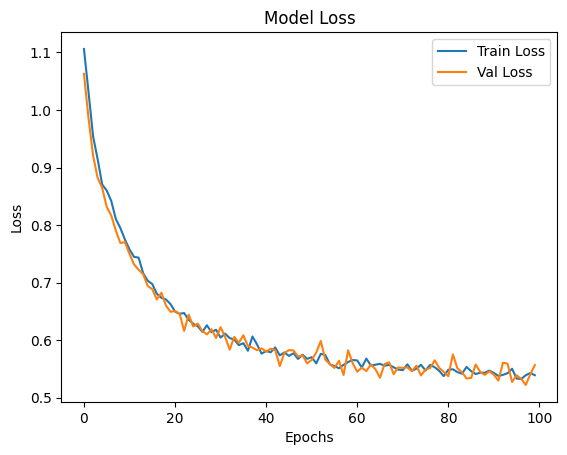

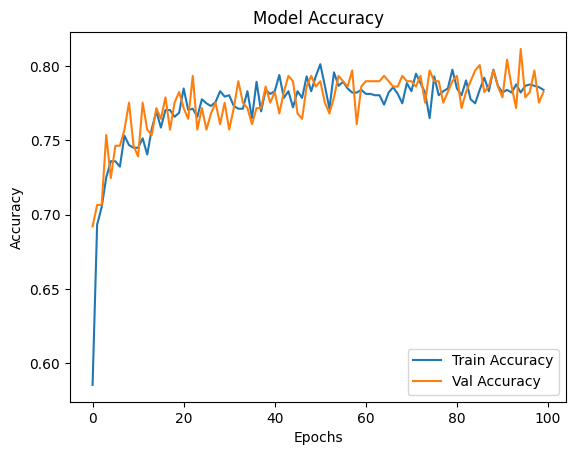

In [20]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [ ]:
y_test.value_counts()


In [21]:
# Evaluate the model using the test data
test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(X_test_scaled, y_test)  # Unpack all returned values

# Display the model loss and accuracy results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8575 - Precision: 0.8466 - Recall: 0.7611 - accuracy: 0.7923 - loss: 0.5496 
Test Loss: 0.5865873098373413
Test Accuracy: 0.7593749761581421
Test Precision: 0.7870967984199524
Test Recall: 0.7349397540092468
Test AUC: 0.8295063376426697


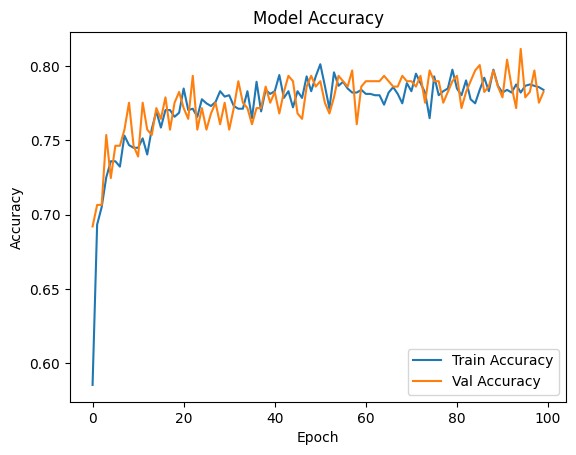

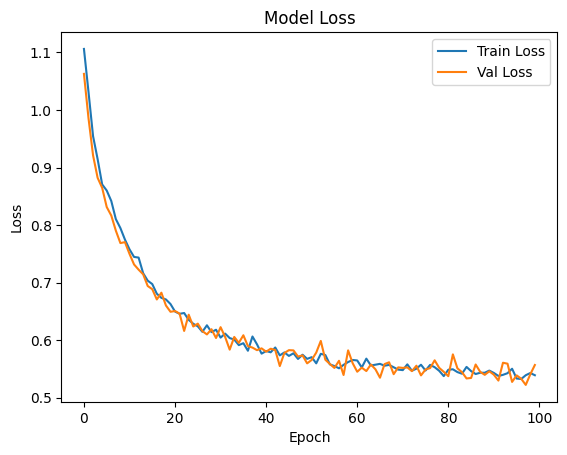

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [23]:
# Save the model to a file
model.save('student_loans.keras')

# Confirm that the model has been saved
print("Model saved as 'student_loans.keras'")



Model saved as 'student_loans.keras'


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [24]:
# Set the model's file path
model_file_path = 'student_loans.keras'

# Load the model to a new object
from tensorflow.keras.models import load_model
loaded_model = load_model(model_file_path)



### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [25]:
# Make predictions with the test data
predictions = loaded_model.predict(X_test)

# Display a sample of the predictions
predictions[:5]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[8.5247325e-04],
       [1.2436781e-06],
       [8.0828828e-01],
       [2.3728487e-06],
       [6.8639606e-01]], dtype=float32)

In [26]:
# Convert the predictions to binary (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame(binary_predictions, columns=['Predicted_Repayment_Success'])

# Display a sample of the DataFrame
predictions_df.head()



,Predicted_Repayment_Success
0,0
1,0
2,1
3,0
4,1


In [27]:
# Make predictions (return probabilities)
y_pred_probs = model.predict(X_test_scaled)

# Convert probabilities to 0 or 1
y_pred = (y_pred_probs > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       154
           1       0.79      0.73      0.76       166

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



### Step 4: Display a classification report with the y test data and predictions

In [28]:
from sklearn.metrics import classification_report

# Generate the classification report
print(classification_report(y_test, predictions_df['Predicted_Repayment_Success']))



              precision    recall  f1-score   support

           0       0.51      0.87      0.64       154
           1       0.65      0.22      0.33       166

    accuracy                           0.53       320
   macro avg       0.58      0.55      0.49       320
weighted avg       0.58      0.53      0.48       320



---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**



1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

- I would need to know if the person looking for the loan is currently employed because that will directly impact the ability to pay the loan.

- I would need to have current financial information that would include current debt to income ratios, credit scores, as well as family financial background.

- I would need to know what the details of the loan are. The amount of the loan and the length of the loan will all play a factor into the ability and likelyhood of the loan being repaid.



2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

- The recommendation system would most likely use content-based filtering. I don't think the other two would really get the results we are looking for. The collaborative system would depend on user interactions or other students to provide recommendations. Context-based filtering would look at the context of a situation rather then specific individual attributes.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

- Privacy and security would be a big concern. Who would have access to the recommendation system and what would the recommendation system give them regarding the individual applying for a student loan.

- Another challenge would be the constant change in interest rates or terms that would fluctuate up or down based off many external factors like inflation, legal policies, etc.